# `DSML_WS_06` - Introduction to ML

Please work on the following tasks **before** the sixth workshop session.

*Note*: Due to the double workshop two weeks ago, there are three tasks to prepare for this workshop.

## 1. Visualizing the Iris dataset

Last week, we learned how to visualize data using Matplotlib and Seaborn. Let us put what we learned together using a familiar dataset: the iris flower dataset.

Complete the following steps:
1. Read in the `iris.csv` dataset and drop missing data.
2. Create a simple scatter plot of the "number" and "Petal.Width" features. Annotate your graph appropriately.
3. You may have noticed some striking patterns emerging from this first plot. So let's dig deeper. Plot Petal.Width vs. Petal.Length on a scatter plot. Colour-code the different species. Hint: You could run `plt.scatter()` for each species and use different colors to differentiate between the species.
4. Finally, let us plot a histogram - a common plot type in data science - which shows the number of occurences of a given observation in the sample. **Use the Seaborn library for this**. Plot the Petal.Width feature. Hint: Using the `data=`, `x=` and `hue=` parameters of the `sns.histplot()` function can be very helpful here.

In [58]:
# Task 1: your code here
import pandas as pd
test_data = pd.read_csv('iris.csv')
test_data.head()

test_data_cleaned = test_data.dropna()
print(test_data_cleaned.head()) #mit .info() kann ich sehen, ob sich was geändert hat


   number  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0       1           5.1          3.5           1.4          0.2  setosa
1       2           4.9          3.0           1.4          0.2  setosa
2       3           4.7          3.2           1.3          0.2  setosa
3       4           4.6          3.1           1.5          0.2  setosa
4       5           5.0          3.6           1.4          0.2  setosa


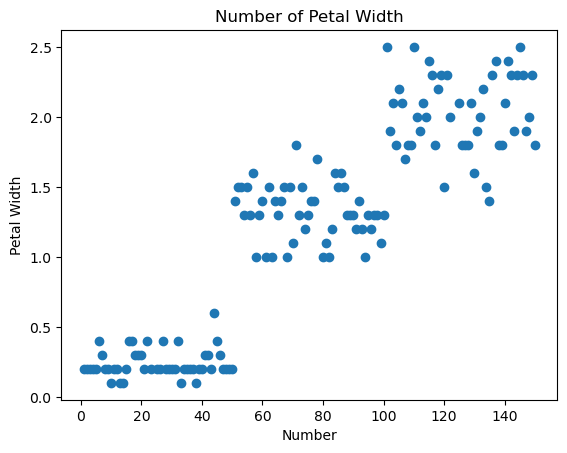

In [59]:
# Task 2: your code here
import matplotlib.pyplot as plt
plt.scatter(test_data_cleaned['number'], test_data_cleaned['Petal.Width'])
plt.xlabel('Number')
plt.ylabel('Petal Width')
plt.title('Number of Petal Width')
plt.show()

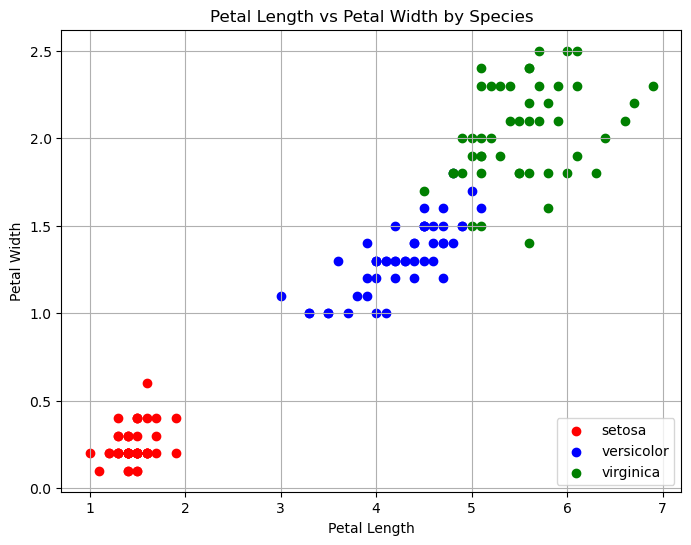

In [60]:
# Task 3: your code here
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}
plt.figure(figsize=(8, 6))
for species in test_data_cleaned['Species'].unique():
    subset = test_data_cleaned[test_data_cleaned['Species'] == species]
    plt.scatter(subset['Petal.Length'], subset['Petal.Width'], c=colors[species], label=species)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width by Species')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

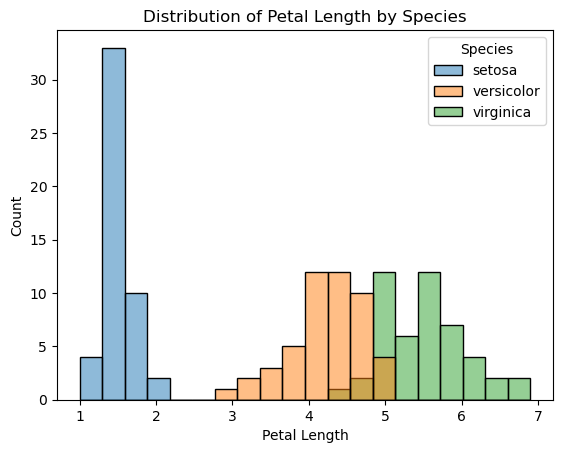

In [61]:
# Task 4: your code here
import seaborn as sns
sns.histplot(data=test_data_cleaned, x='Petal.Length', hue='Species', bins = 20)
plt.xlabel('Petal Length')  
plt.ylabel('Count')
plt.title('Distribution of Petal Length by Species')
plt.show()

## 2. Analyzing speed limit violations in Cologne

Last week, we really got into hands-on data science using carsharing availability data. Let's put what we learned into practice using data on speed limit violations from August 2022 (the provided datasets are based on this publicly available dataset accessible via [this link](https://offenedaten-koeln.de/dataset/geschwindigkeitsueberwachung-koeln)). The following information are available:
- *date*: date of the violation
- *time*: time of the violation 
- *speed*: speed in km/h
- *excess_speed*: speed above the allowed speed limit in km/h
- *location_id*: identifier of the speed control location

Additionally, we have a dataset with further information on the speed control, including:
- *location_id*: identifier of the speed control location
- *speed_limit*: speed limit in km/h
- *district*: abbreviation for city district of speed control location
- *street*: street name of speed control location

Complete the following steps:
1. Import pandas and load the speeding violations dataset (speeding_cgn_2018_08.csv). Is there missing data? How many violations were there in total during the selected period?
2. Let's properly format the *date* and *time* columns. Combine them into one column and transform them to datetime format. Extract the hour and day of week, and add them as new columns to the dataframe. Hint: make sure that you specify the correct format when transforming to datetime.
3. We want to add the information on the speed control locations contained in *control_locations.csv*. We only want to analyze those violations at control locations for which we have data in control_locations.csv. Load *control_locations.csv* and perform the appropriate merge, so that all relevant information are in one dataframe. Hint: think about the correct setting for the how-parameter in merge.
4. Create two plots: first, show boxplots of the number of speeding violations by day of week. Second, show boxplots of the number of speeding violations by hour of day.

Feel free to use your knowledge to conduct further analyses on the dataset!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57014 entries, 0 to 57013
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          57014 non-null  object
 1   time          57014 non-null  object
 2   speed         57014 non-null  int64 
 3   excess_speed  57014 non-null  int64 
 4   location_id   57014 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ MB
None
56365


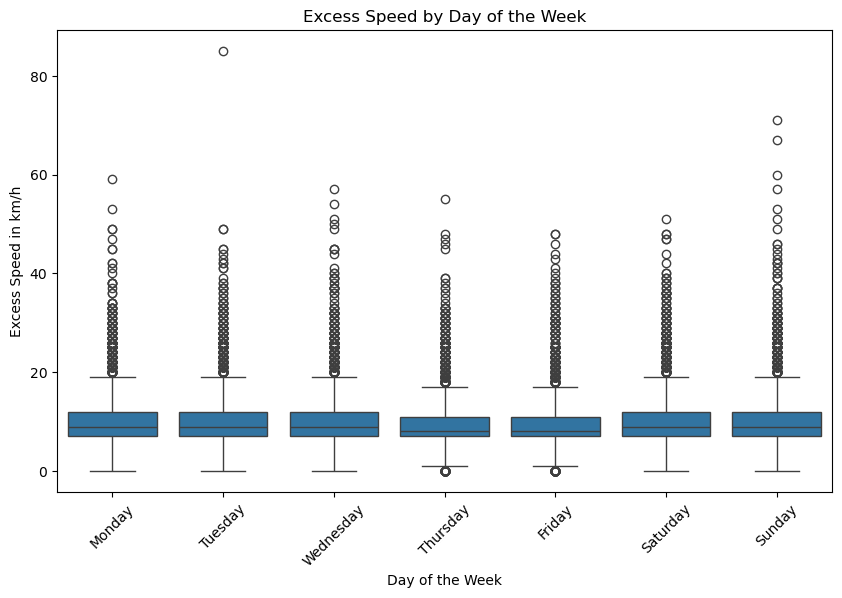

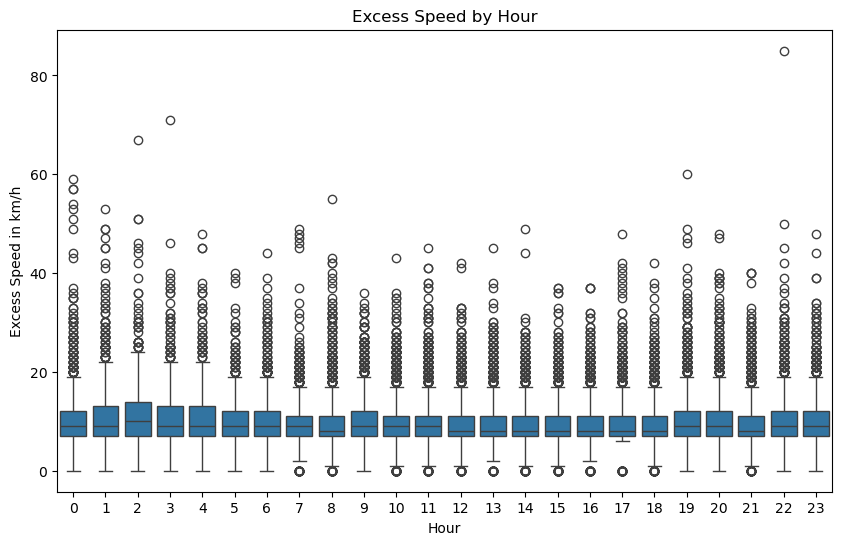

In [85]:
# your code here
import pandas as pd
speed_data = pd.read_csv('speeding_cgn_2018_08.csv')
#Missing data
print(speed_data.info()) #Hier sehe ich, dass es keine NaN-Werte gibt
#Daten mit Geschwindigkeitsübertretung
speed_violations = speed_data[speed_data['excess_speed'] > 0]['excess_speed'].count()
print(speed_violations)

#Ordentliche Formatierung vom Datum
speed_data['datetime'] = pd.to_datetime(speed_data['date'] + ' ' + speed_data['time'], format='%d/%m/%y %H:%M:%S', dayfirst=True)
speed_data['hour'] = speed_data['datetime'].dt.hour
speed_data['day_of_the_week'] = speed_data['datetime'].dt.day_name()
speed_data.head()

control_locations = pd.read_csv('control_locations.csv')
merge_data = speed_data.merge(control_locations, on = "location_id", how = "inner")
merge_data.head()

plt.figure(figsize=(10, 6))
sns.boxplot(x = "day_of_the_week", y = "excess_speed", data = speed_data)
plt.xlabel('Day of the Week')
plt.ylabel('Excess Speed in km/h')
plt.title('Excess Speed by Day of the Week')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x = "hour", y = "excess_speed", data = speed_data)
plt.xlabel('Hour')
plt.ylabel('Excess Speed in km/h')
plt.title('Excess Speed by Hour')
plt.show()





## 3. Getting started with ML in Python

This week, we will start looking at how to do machine learning in Python. Specifically, we will start predicting continuous variables.

Let's get a first understanding using a familiar dataset - the tips dataset from Seaborn. Execute the following cell to load the dataset.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


When we visualized this dataset in an earlier workshop, we noticed that there is a relationship between `total_bill` and `tip` (which is no surprise). Create a scatter plot of these two features with `total_bill` on the x-axis and `tip` on the y-axis.

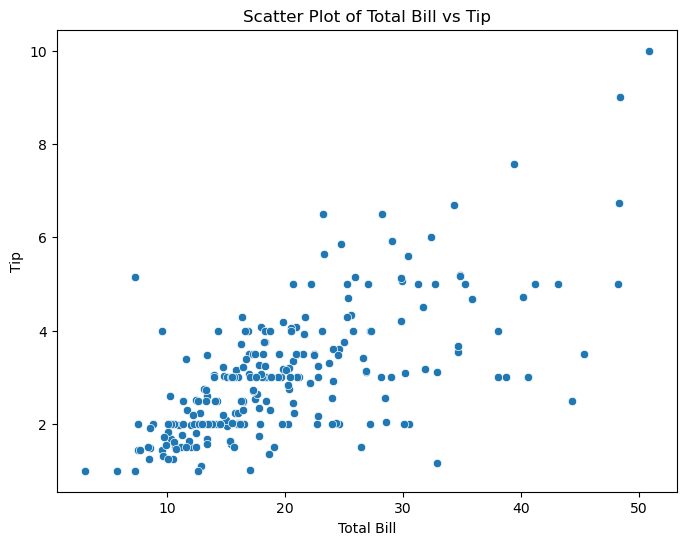

In [3]:
# your code here
tips = sns.load_dataset("tips")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

Imagine a restaurant asks you to predict tips based on the total bill of customers. You propose to make predictions based on a simple linear model of the form
\begin{equation}
\mathrm{tip} \approx \theta_1 \cdot \mathrm{total\_bill} + \theta_2
\end{equation}
where $\theta_1$ is the slope of the line and $\theta_2$ is the intercept term.

Based on the plot you generated above, guess appropriate values for the slope and intercept and assign them to variables.

In [14]:
# your code here
theta1 = 1
theta2 = 1.5

Once you have chosen values for slope and intercept, re-generate the scatter plot from above, but add your linear prediction to the plot.

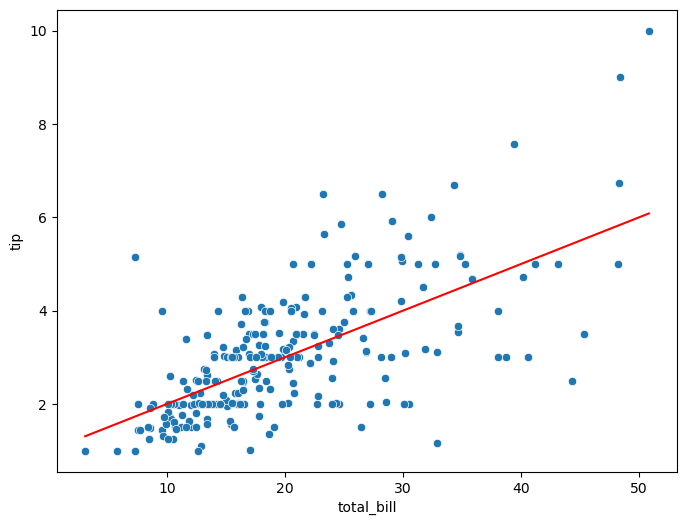

In [35]:
# your code here
import numpy as np
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tips, x="total_bill", y="tip")
x_values = np.linspace(tips["total_bill"].min(), tips["total_bill"].max(), 100)
y_values = [0.1 * x +1 for x in x_values]
plt.plot( x_values, y_values, 'red', label='True')


The first observation in our tips dataset has a total bill of 17 dollars and gave a tip of 1 dollar. How far is your prediction for this observation off?

In [16]:
# your code here
tip_predictions = theta2 * 17

print(tip_predictions - 1)

24.5
